<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=400 height=300 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

 
### Mateo Andrei Fernández Valverde
### Ingenieria en Biotecnologia
### 22 años
### Quiteño
### 1725303059

**03-08-2022**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mp # graficos 
import seaborn as sb # estadistica y visualizacio

In [2]:
Caracterizticas_del_computador = pd.DataFrame({'Caracteristicas del computador' : ["AMD Ryzen 3 4300U ", "Radeon Graphics 2.70 GHz", "4,00 GB (3,36 GB utilizable)",  "Windows 10 Home Single Language","21H2"]}, index=['Procesador', 'Grafica', 'RAM instalada', 'Windows', 'Version'])
Caracterizticas_del_computador

,Caracteristicas del computador
Procesador,AMD Ryzen 3 4300U
Grafica,Radeon Graphics 2.70 GHz
RAM instalada,"4,00 GB (3,36 GB utilizable)"
Windows,Windows 10 Home Single Language
Version,21H2


<font color='red'>Color de texto</font>


### REQUERIMIENTOS PARA EL EXAMEN

Utilice de preferencia ```Jupyter``` de Anaconda, dado que tienen que hacer un control de cambios en cada pregunta. 

Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2022I_GBI6_ExamenPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 0 [0.5 puntos]
Realice cambios al cuaderno de jupyter: 

- Agregue el logo de la Universidad

- Coloque sus datos personales 
 - Escriba una **tabla** con las características de su computador 

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```map_science```: para su data replique el ejemplo de [MapOfScience](https://github.com/CSB-book/CSB/blob/master/regex/solutions/MapOfScience_solution.ipynb), donde los puntos resaltados son al menos 5 países

iii *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e **imprima docstring de cada función**.


In [4]:
# Escriba aquí su código para el ejercicio 1
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank
def download_pubmed(keyword): 
    """Permite descargar articulos desde PUB med"""
    Entrez.email = 'A.N.Other@example.com'
    handle = Entrez.esearch(db="pubmed", term= keyword, usehistory="y")
    record = Entrez.read(handle)
    # generate a Python list with all Pubmed IDs of articles about Dengue Network
    id_list = record["IdList"]
    record["Count"]
    webenv = record["WebEnv"]
    query_key = record["QueryKey"]
    handle = Entrez.efetch(db="pubmed", rettype="medline", retmode="text", retstart=0, retmax=543, webenv=webenv, query_key=query_key)
    out_handle = open("data/resultado_pubmed.txt", "w")
    resultado = handle.read()
    handle.close()
    out_handle.write(resultado)
    out_handle.close()
    return (id_list)  
import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """Utiliza la variable AD para realizar el data frame """
    with open("resultado_pubmed.txt", errors="ignore") as f: 
        texto = f.read() 
    if  tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["numero de autores"] = resultado.values()
        return (veces_pais)
    
help(download_pubmed)
help(mining_pubs)



Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Permite descargar articulos desde PUB med

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    Utiliza la variable AD para realizar el data frame




## Ejercicio 2 [2 puntos]


Utilice dos veces la función ```download_pubmed``` para: 

- Descargar la data, utilizando los keyword de su preferencia. 
- Guardar el archivo descargado en la carpeta ```data```.

Para cada corrida, imprima lo siguiente: 

```python
'El número artículos para KEYWORD es: XX' # Que se cargue con inserción de texto o valor que correspondea KEYWORD y XX
```

In [5]:
# Escriba aquí su código para el ejercicio 2
import miningscience
journals = miningscience.download_pubmed("Ilex guayusa")
print ("El numero de articulos es:", len(journals)) 



El numero de articulos es: 20


## Ejercicio 3 [1.5 puntos]

Utilice dos veces la función ```map_science``` para: 

- Visualizar un mapa para cada data descargada en el ejercicio 2.
- Guardar los mapas en la carpeta ```img```

       pais  numero de autores
0  Colombia                 17
1     China                 13
2   Ecuador                 32
3       USA                  7
4     Italy                  2
5     Spain                 11


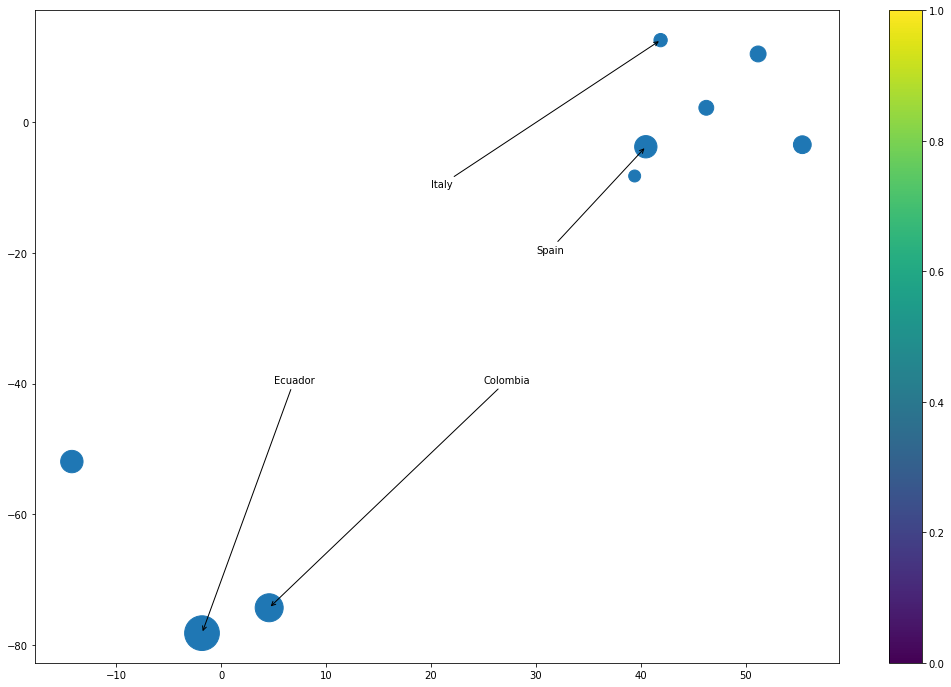

In [6]:
# Escriba aquí su código para el ejercicio 3
countries = miningscience.mining_pubs("AD")
print (countries.iloc[0:])
countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 4.570868, -1.831239  ] 
                 
countries_europe = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -74.297333, -78.183406]

repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]
import matplotlib.pyplot as plot
fig =plot.figure()
plot.scatter(countries_lat, countries_europe, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (5,-40), arrowprops = ard) 
plot.annotate("Colombia", xy= ( 4.570868, -74.297333),
            xytext = (25, -40), arrowprops = ard)
plot.annotate("China", xy= (35.86166, 104.195397),
              xytext = (10, -2), arrowprops = ard)
plot.annotate("USA", xy= (37.09024, -95.7128917),
              xytext = (5, -10), arrowprops = ard)
plot.annotate("Italy", xy= (41.87194, 12.56738),
              xytext = (20, -10), arrowprops = ard)
plot.annotate("Spain", xy= (40.463667, -3.74922),
            xytext = (30, -20), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()
fig.savefig("img/mapas.jpg")


## Ejercicio 4 [1 punto]

**Interprete** los resultados de las figuras del **ejercicio 3**

*Escriba la respuesta del ejercicio 5*
El tamaño del punto representa el numero de autores de cada pais, mientras mas grande, mayor es el numero de autores.
- Ecuador tiene el mayor numero de autores
- Colombia tiene el segundo lugar en autores
- España tiene el tercer lugar
- Italia tiene el menor numero de autores
El color respresenta el numero de publicaciones, mientras mas cercano a amarillo mayor es el numero de publicaciones.
- Todos presentan un color azul y tiene un numeor medio de publicaciones

## Ejercicio 5 [2 puntos]

Para algún **gen de interés** (podría usar [Lista de genes por tipología](https://www.genome.jp/kegg/pathway.html#metabolism)), realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda y guarde en la carpeta ```data```.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de las secuencias de los **quince primeros** IDs de la accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Guarde su arbol filogénetico en la carpeta ```img```

5. Interprete el árbol del paso 4. 

In [ ]:
# Escriba aquí su código para el ejercicio 5
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 
import matplotlib
import matplotlib.pyplot as plt
with open("sequence.seq", errors="ignore") as file: 
     texto_1 = file.read()
accession = texto_1.split("\n")
Entrez.email="A.N.Other@example.com"
archivo = open("secuencias.txt", "w")
for i in accession[0:15]:  
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    archivo.write(handle.read())
with open("alineamiento.txt", "r") as f: 
    alignment = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True
Imagen = Phylo.draw_ascii(tree)
Imagen.savefig("img"/'tree.jpg')

**Escriba aquí la interpretación del árbol**
### ***La secuencia CA833132.1 es la mas cercana a un ancestro comun de secuencia genetica, es decir es muy similar a la secuencia precursora de ese gen. En cambio la secuencia CA833031.1 es la mas lejana es decir la que tiene mas diferecia***.
##### ***psdt. No se porque no se guarda mi imagen :(***

## Ejercicio 6 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada
- Un diagrama de procesos del módulo ```miningscience```
3. Asegurarse que su repositorio tiene las carpetas ```data``` e ```img``` con los archivos que ha ido guardando en las preguntas anteriores.  
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 5), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado el ejercicio 1  
```
```sh 
Carlitos Alimaña ha realizado el ejercicio 2
```
```sh 
...
```


In [14]:
import Bio
print(Bio.__version__)
import csv 
print(csv.__version__)
import re 
print(re.__version__)
import pandas 
print(pandas.__version__)
import numpy 
print(numpy.__version__)
import matplotlib
print(matplotlib.__version__)
import seaborn 
print(seaborn.__version__)

1.79
1.0
2.2.1
1.4.2
1.21.5
3.5.1
0.11.2
